In [2]:
import numpy as np
import matplotlib.pyplot as plt

from ctapipe.utils import get_dataset_path
from eventio import SimTelFile


In [56]:
simtel_file = get_dataset_path('gamma_test_large.simtel.gz')
simtel_file = '/Users/thomasvuillaume/Work/CTA/Data/simu_mc/Simtel/proton_20deg_0deg_run24___cta-prod3_desert-2150m-Paranal-merged.simtel.gz'

In [57]:
source = SimTelFile(simtel_file)

In [58]:
source.mc_run_headers[0]

{'B_declination': 0.0,
 'B_inclination': -0.39641156792640686,
 'B_total': 23.11772346496582,
 'E_range': array([4.e-03, 6.e+02], dtype=float32),
 'alt_range': array([1.2217305, 1.2217305], dtype=float32),
 'atmosphere': 26,
 'az_range': array([0., 0.], dtype=float32),
 'core_pos_mode': 1,
 'core_range': array([   0., 3000.], dtype=float32),
 'corsika_bunchsize': 5.0,
 'corsika_high_E_detail': 303,
 'corsika_high_E_model': 3,
 'corsika_iact_options': 187,
 'corsika_low_E_detail': 0,
 'corsika_low_E_model': 2,
 'corsika_wlen_max': 700.0,
 'corsika_wlen_min': 240.0,
 'detector_prog_id': 1,
 'detector_prog_start': 1467479470,
 'detector_prog_vers': 1462392225,
 'diffuse': 1,
 'injection_height': -1.0,
 'num_showers': 100000,
 'num_use': 20,
 'obsheight': 2150.0,
 'shower_prog_id': 1,
 'shower_prog_start': 1467460800,
 'shower_prog_vers': 6990,
 'spectral_index': -2.0,
 'viewcone': array([ 0., 10.], dtype=float32)}

In [78]:
emin, emax = source.mc_run_headers[0]['E_range']
spectral_index = source.mc_run_headers[0]['spectral_index']
num_showers = source.mc_run_headers[0]['num_showers']
num_use = source.mc_run_headers[0]['num_use']
num_events = num_showers * num_use

---
## Compute the energy distribution

\begin{align}
N_{tot} = \int_{E_{min}}^{E_{max}} \frac{dN}{dE} dE = \int_{E_{min}}^{E_{max}} E^{\gamma} dE
\end{align}

If $\gamma = 1$:
$$
N_{tot} = \ln(E_{max}/E_{min})
$$

Else:
$$
N_{tot} = \frac{E_{max}^{\gamma+1} - E_{min}^{\gamma+1}}{\gamma + 1}
$$

In [112]:
def integrated_dist(bins, tot_num_events, spectral_index):
    emin = np.min(bins)
    emax = np.max(bins)
    e_mean = (bins[1:] + bins[:-1])/2.
    if spectral_index == -1:    
        y0 = tot_num_events / np.log(emax/emin)
        y = y0 * np.log(bins[1:]/bins[:-1])
    else:
        y0 = tot_num_events / (emax**(spectral_index+1) - emin**(spectral_index+1))/(spectral_index+1)
        y = y0 * (bins[1:]**(spectral_index+1) - bins[:-1]**(spectral_index+1))/(spectral_index+1)
    return y

---

## Getting the simulated energies

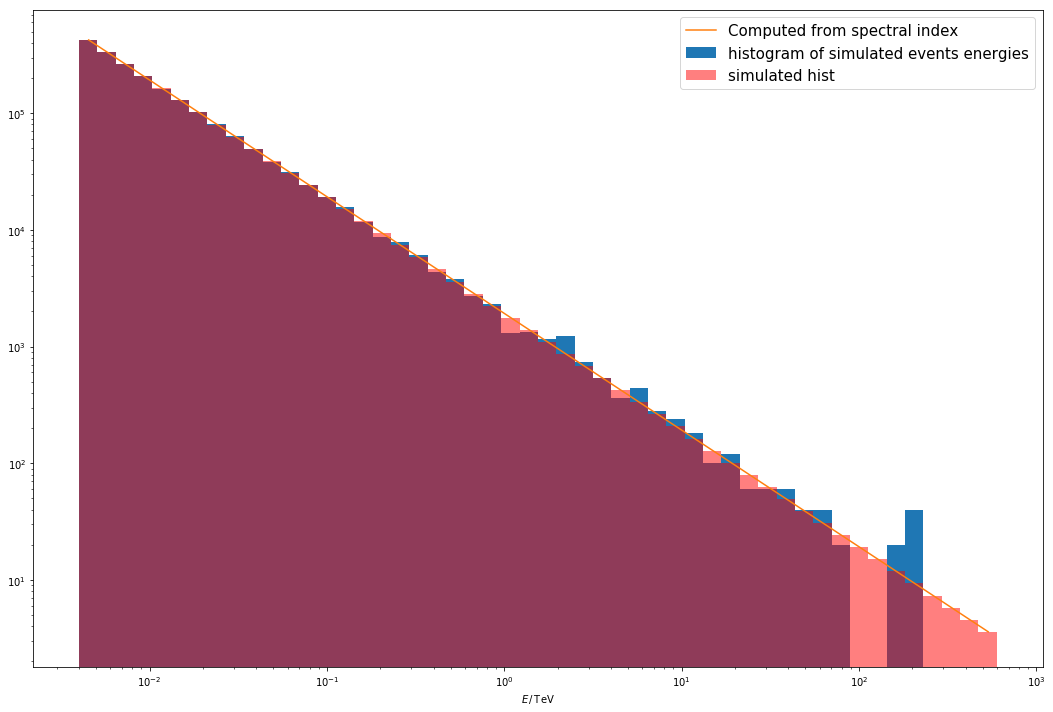

In [136]:
bins = np.logspace(np.log10(emin),
                   np.log10(emax),
                   51,
                  )

e_mean = (bins[:-1] + bins[1:])/2.
y = integrated_dist(bins, num_events, spectral_index)


plt.figure(figsize=(15,10))
plt.hist(energies, bins=bins, label='histogram of simulated events energies')
plt.xscale('log')
plt.xlabel(r'$E \,/\, \mathrm{TeV}$')
plt.tight_layout()
plt.yscale('log')

plt.plot(e_mean, y, label='Computed from spectral index')

plt.bar(e_mean, y, width=bins[:-1]-bins[1:], log=True, color='red', alpha=0.5, label='simulated hist')

plt.legend(fontsize=15);
